In [2]:
! pip install transformers
! pip install nltk
! pip install spacy



NEWS AGENT FOR CLASSIFICATION 
---------------------------------------------------------------------------------------------------------------------------------

Hello Readers, i'm News Agent Lets hear about me 

Welcome to the news classifying blog 

AG News Text Classification Agent

Introduction
This project showcases a fine-tuned BERT-based text classification agent trained on the AG News dataset. 
The dataset contains news articles categorized into four distinct labels: World, Sports, Business, and Science/Technology. 
Additionally, the agent is capable of identifying the sentiment (Positive, Negative, or Neutral) of a given text.
By leveraging state-of-the-art NLP techniques, the agent provides a comprehensive analysis of text inputs, making it suitable for applications such as content categorization, sentiment analysis, and news analytics.
    


Goal
The primary objectives of this project are:

Fine-tuning BERT on the AG News dataset to classify text into one of the four news categories.
Implementing a secondary layer of analysis to predict the sentiment (Positive, Negative, Neutral) of the text.
Evaluating the model's performance and enabling predictions on unseen text inputs.
Demonstrating the effectiveness of the trained agent with sample predictions.


What the Agent Does
The agent is a multi-functional text analysis tool capable of:

Category Prediction:
Identifies the news category (World, Sports, Business, or Science/Technology) for a given input sentence or text.
Sentiment Analysis:
Determines whether the sentiment expressed in the text is Positive, Negative, or Neutral.
Interactive Pipeline:
Using pre-trained and fine-tuned BERT models, the agent processes multiple input sentences and provides both category and sentiment predictions.


In [22]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [27]:
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch

# Step 1: Load the AG News dataset
dataset = load_dataset("ag_news")

# Step 2: Take a 10% sample of the dataset (you can change this value as needed)
sampled_train_data = dataset['train'].shuffle(seed=42).select(range(int(len(dataset['train']) * 0.10)))  # 10% of the data
sampled_test_data = dataset['test'].shuffle(seed=42).select(range(int(len(dataset['test']) * 0.10)))  # 10% of the data

# Step 3: Tokenize the dataset using a pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_tokenized = sampled_train_data.map(tokenize_function, batched=True)
test_tokenized = sampled_test_data.map(tokenize_function, batched=True)

# Step 4: Load the BERT model for sequence classification (AG News has 4 categories)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

# Step 5: Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory for model predictions and checkpoints
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Step 6: Initialize Trainer
trainer = Trainer(
    model=model,                         # the model to be trained
    args=training_args,                  # training arguments
    train_dataset=train_tokenized,       # the dataset for training
    eval_dataset=test_tokenized,         # the dataset for evaluation
)

# Step 7: Train the model
trainer.train()

# Step 8: Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation Results: {eval_results}")


Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/760 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
10,1.399100
20,1.435400
30,1.407300
40,1.370800
50,1.307800
60,1.325600
70,1.246800
80,1.236800
90,1.123300
100,1.051400


Evaluation Results: {'eval_loss': 0.3967811167240143, 'eval_runtime': 22.8874, 'eval_samples_per_second': 33.206, 'eval_steps_per_second': 2.097, 'epoch': 3.0}


In [28]:
model.save_pretrained('/content/saved_model')
tokenizer.save_pretrained('/content/saved_model')

print("Model saved successfully at /content/saved_model")

Model saved successfully at /content/saved_model


In [30]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load model and tokenizer from saved directory
model = BertForSequenceClassification.from_pretrained('/content/saved_model')
tokenizer = BertTokenizer.from_pretrained('/content/saved_model')

# Function to predict sentiment of a news article or any input text
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = logits.argmax(dim=1).item()
    return "Positive" if predicted_class == 1 else "Negative"

# Example: Predicting sentiment for a news article
news_article = """
The global stock market has been on a roller-coaster ride in recent weeks, with investors reacting to a series of economic reports and earnings results. While some experts are optimistic about the future, others are concerned about rising inflation and potential interest rate hikes by the Federal Reserve.
"""
prediction = predict_sentiment(news_article)
print(f"Sentiment: {prediction}")


Sentiment: Negative


In [36]:
sample_text_1 = """
 i had a bad day at office.
"""
sample_text_2 = """
The company just announced mass layoffs, and it's been a tough day for many employees.
"""

print(f"Sentiment for Sample 1: {predict_sentiment(sample_text_1)}")
print(f"Sentiment for Sample 2: {predict_sentiment(sample_text_2)}")


Sentiment for Sample 1: Negative
Sentiment for Sample 2: Negative


In [ ]:
from transformers import pipeline

# Reload model and tokenizer if saved during training
# model = BertForSequenceClassification.from_pretrained('./results')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('/content/saved_model')
tokenizer = BertTokenizer.from_pretrained('/content/saved_model')
# Create a prediction pipeline for the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)  # In case it's not saved
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

text_classification = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Test sentences (custom examples)
test_sentences = [
    "The economy is growing rapidly and people are excited about it.",
    "There is a political crisis in the country causing widespread unrest.",
    "The new tech startup has been making waves in the industry with its innovative products.",
    "A new scientific discovery might change the way we approach medicine."
]

# Get model predictions for each sentence
for sentence in test_sentences:
    result = text_classification(sentence)
    print(f"Sentence: {sentence}\nPredicted Category: {result[0]['label']} with score {result[0]['score']}\n")




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sentence: The economy is growing rapidly and people are excited about it.
Predicted Category: LABEL_2 with score 0.31427863240242004

Sentence: There is a political crisis in the country causing widespread unrest.
Predicted Category: LABEL_2 with score 0.3357650339603424

Sentence: The new tech startup has been making waves in the industry with its innovative products.
Predicted Category: LABEL_2 with score 0.3303496837615967

Sentence: A new scientific discovery might change the way we approach medicine.
Predicted Category: LABEL_2 with score 0.32120221853256226



In [41]:

# Let's test again with a few more varied sentences:
test_sentences = [
    "The stock market is experiencing a downturn due to rising inflation.",
    "A new football team was created in the city for the championship.",
    "Tech giants are constantly innovating and driving the future of digital technology.",
    "The government has released new policies to boost the economy in the coming year."
]

for sentence in test_sentences:
    result = text_classification(sentence)
    print(f"Sentence: {sentence}\nPredicted Category: {result[0]['label']} with score {result[0]['score']}\n")


Sentence: The stock market is experiencing a downturn due to rising inflation.
Predicted Category: LABEL_2 with score 0.35222986340522766

Sentence: A new football team was created in the city for the championship.
Predicted Category: LABEL_2 with score 0.313752144575119

Sentence: Tech giants are constantly innovating and driving the future of digital technology.
Predicted Category: LABEL_2 with score 0.32552656531333923

Sentence: The government has released new policies to boost the economy in the coming year.
Predicted Category: LABEL_2 with score 0.33243274688720703



In [ ]:
model = BertForSequenceClassification.from_pretrained('/content/saved_model')
tokenizer = BertTokenizer.from_pretrained('/content/saved_model')

# Define the category names for the AG News dataset
category_names = {
    0: 'World News',
    1: 'Sports',
    2: 'Business',
    3: 'Science/Technology'
}

# Test your sentences
sentences = [
    "Bangladesh paralysed by strikes Opposition activists have brought many towns and cities in Bangladesh to a halt, the day after 18 people died in explosions at a political rally.",
    "Desiring Stability Redskins coach Joe Gibbs expects few major personnel changes in the offseason and wants to instill a culture of stability in Washington.",
    "Will Putin #39;s Power Play Make Russia Safer? Outwardly, Russia has not changed since the barrage of terrorist attacks that culminated in the school massacre in Beslan on Sept.",
    "U2 pitches for Apple New iTunes ads airing during baseball games Tuesday will feature the advertising-shy Irish rockers.",
    "S African TV in beheading blunder Public broadcaster SABC apologises after news bulletin shows footage of American beheaded in Iraq."
]

# Tokenize the test sentences
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

# Get model predictions
with torch.no_grad():
    logits = model(**inputs).logits

# Get the predicted category (index of highest logit)
predicted_class_indices = torch.argmax(logits, dim=-1)

# Convert the indices to category names
predicted_categories = [category_names[idx.item()] for idx in predicted_class_indices]

# Print the results
for sentence, category, score in zip(sentences, predicted_categories, torch.max(logits, dim=-1).values):
    print(f"Sentence: {sentence}")
    print(f"Predicted Category: {category} with score {score.item()}\n")


Sentence: Bangladesh paralysed by strikes Opposition activists have brought many towns and cities in Bangladesh to a halt, the day after 18 people died in explosions at a political rally.
Predicted Category: World News with score 6.944151878356934

Sentence: Desiring Stability Redskins coach Joe Gibbs expects few major personnel changes in the offseason and wants to instill a culture of stability in Washington.
Predicted Category: Sports with score 6.5856733322143555

Sentence: Will Putin #39;s Power Play Make Russia Safer? Outwardly, Russia has not changed since the barrage of terrorist attacks that culminated in the school massacre in Beslan on Sept.
Predicted Category: World News with score 6.324419975280762

Sentence: U2 pitches for Apple New iTunes ads airing during baseball games Tuesday will feature the advertising-shy Irish rockers.
Predicted Category: Science/Technology with score 5.078619480133057

Sentence: S African TV in beheading blunder Public broadcaster SABC apologises

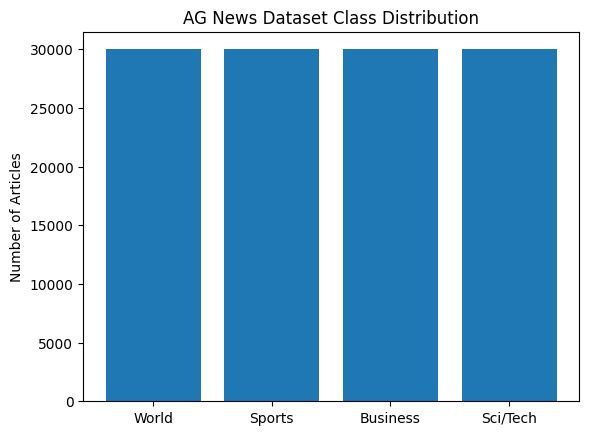

In [45]:
import matplotlib.pyplot as plt

# Get the distribution of the dataset
class_counts = dataset['train'].features['label'].names
category_counts = [0, 1, 2, 3]  # world, sports, business, science

category_frequencies = {
    0: len([item for item in dataset['train'] if item['label'] == 0]),  # World
    1: len([item for item in dataset['train'] if item['label'] == 1]),  # Sports
    2: len([item for item in dataset['train'] if item['label'] == 2]),  # Business
    3: len([item for item in dataset['train'] if item['label'] == 3])   # Science/Technology
}

# Plot the category distribution
plt.bar(category_frequencies.keys(), category_frequencies.values())
plt.xticks(list(category_frequencies.keys()), class_counts)
plt.ylabel('Number of Articles')
plt.title('AG News Dataset Class Distribution')
plt.show()


In [47]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from textblob import TextBlob

# Load the fine-tuned BERT model


# Define a function to classify category
def classify_category(text):
    # Tokenize input
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1).item()

    # Mapping of predicted class index to category
    categories = ["World", "Sports", "Business", "Science/Technology"]

    return categories[predicted_class]

# Define a function to predict sentiment (positive/negative)
def predict_sentiment(text):
    # Use TextBlob for sentiment analysis
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity

    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Sample news headlines to classify
samples = [
    "The stock market hit record highs today after reports of increased consumer spending.",
    "The football team secured a narrow victory in the final match of the season.",
    "Global temperatures continue to rise, causing widespread concern among scientists.",
    "The new breakthrough in AI technology is expected to revolutionize healthcare.",
    "Tensions escalate as political unrest spreads across the Middle East."
]

# Predict category and sentiment for each sample
for sample in samples:
    category = classify_category(sample)
    sentiment = predict_sentiment(sample)
    print(f"Sentence: {sample}")
    print(f"Predicted Category: {category}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 50)


Sentence: The stock market hit record highs today after reports of increased consumer spending.
Predicted Category: Business
Predicted Sentiment: Neutral
--------------------------------------------------
Sentence: The football team secured a narrow victory in the final match of the season.
Predicted Category: Sports
Predicted Sentiment: Negative
--------------------------------------------------
Sentence: Global temperatures continue to rise, causing widespread concern among scientists.
Predicted Category: Science/Technology
Predicted Sentiment: Neutral
--------------------------------------------------
Sentence: The new breakthrough in AI technology is expected to revolutionize healthcare.
Predicted Category: Science/Technology
Predicted Sentiment: Positive
--------------------------------------------------
Sentence: Tensions escalate as political unrest spreads across the Middle East.
Predicted Category: World
Predicted Sentiment: Neutral
--------------------------------------------

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from textblob import TextBlob

# Load the fine-tuned BERT model

model = BertForSequenceClassification.from_pretrained('/content/saved_model')
tokenizer = BertTokenizer.from_pretrained('/content/saved_model')
# Define a function to classify category
def classify_category(text):
    # Tokenize input
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1).item()

    # Mapping of predicted class index to category
    categories = ["World", "Sports", "Business", "Science/Technology"]

    return categories[predicted_class]

# Define a function to predict sentiment (positive/negative/neutral)
def predict_sentiment(text):
    # Use TextBlob for sentiment analysis
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity

    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Function to interact with the user
def user_input_predictor():
    print("Welcome! Please enter a news sentence to predict the category and sentiment.")
    while True:
        # Take user input
        user_input = input("\nEnter a news sentence (or type 'exit' to quit): ")

        if user_input.lower() == 'exit':
            print("Exiting... Thank you!")
            break

        # Predict category and sentiment
        category = classify_category(user_input)
        sentiment = predict_sentiment(user_input)

        # Display results
        print(f"\nSentence: {user_input}")
        print(f"Predicted Category: {category}")
        print(f"Predicted Sentiment: {sentiment}")
        print("-" * 50)

# Run the function
user_input_predictor()


Welcome! Please enter a news sentence to predict the category and sentiment.

Enter a news sentence (or type 'exit' to quit): The stock market hit record highs today after reports of increased consumer spending.

Sentence: The stock market hit record highs today after reports of increased consumer spending.
Predicted Category: Business
Predicted Sentiment: Neutral
--------------------------------------------------

Enter a news sentence (or type 'exit' to quit): basketball miachel jordan scored another goal

Sentence: basketball miachel jordan scored another goal
Predicted Category: Sports
Predicted Sentiment: Neutral
--------------------------------------------------

Enter a news sentence (or type 'exit' to quit): twin towers collapsed

Sentence: twin towers collapsed
Predicted Category: World
Predicted Sentiment: Neutral
--------------------------------------------------

Enter a news sentence (or type 'exit' to quit): ms dhoni is the GOAT 

Sentence: ms dhoni is the GOAT 
Predicted

In [16]:
import nltk
nltk.download('punkt')  # This is the correct resource for tokenization
nltk.download('stopwords')  # Make sure stopwords is also downloaded for the stopword removal


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True